# GSA Data Investigation

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from DataReader import DataCentreWrangler, DataReader
from ImageManipulation import ImageManipulation, convert_to_decimal_degrees

## Data Load

### File handling

In [2]:
TARGET_DIR = 'Data/Global Solar Atlas/'

In [3]:
os.listdir(TARGET_DIR)

['.ipynb_checkpoints',
 'DIF.tif',
 'DNI.tif',
 'GSA Investigation.ipynb',
 'PVOUT.prj',
 'PVOUT.tif',
 'PVOUT.tif.pdf',
 'PVOUT_avg_daily.tif.pdf',
 'PVOUT_Yearly_sum.tif',
 'South-Africa_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID.zip',
 'South-Africa_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF.zip',
 'South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_AAIGRID.zip',
 'South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF',
 'South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF.zip',
 'South-Africa_GISdata_LTAy_DailySum_GlobalSolarAtlas_AAIGRID.zip',
 'South-Africa_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF.zip',
 'South-Africa_GISdata_LTAy_YearlySum_GlobalSolarAtlas_AAIGRID.zip',
 'South-Africa_GISdata_LTAy_YearlySum_GlobalSolarAtlas_GEOTIFF.zip',
 'YearlySum']

In [4]:
TIFF_Files = [TARGET_DIR + file for file in os.listdir(TARGET_DIR) if 'TIFF' in file]
TIFF_Files

['Data/Global Solar Atlas/South-Africa_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF.zip',
 'Data/Global Solar Atlas/South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF',
 'Data/Global Solar Atlas/South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF.zip',
 'Data/Global Solar Atlas/South-Africa_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF.zip',
 'Data/Global Solar Atlas/South-Africa_GISdata_LTAy_YearlySum_GlobalSolarAtlas_GEOTIFF.zip']

In [5]:
AAI_Files = [TARGET_DIR + file for file in os.listdir(TARGET_DIR) if 'AAIGRID' in file]
AAI_Files

['Data/Global Solar Atlas/South-Africa_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID.zip',
 'Data/Global Solar Atlas/South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_AAIGRID.zip',
 'Data/Global Solar Atlas/South-Africa_GISdata_LTAy_DailySum_GlobalSolarAtlas_AAIGRID.zip',
 'Data/Global Solar Atlas/South-Africa_GISdata_LTAy_YearlySum_GlobalSolarAtlas_AAIGRID.zip']

### load Tiff file

In [6]:
os.listdir(TARGET_DIR)

['.ipynb_checkpoints',
 'DIF.tif',
 'DNI.tif',
 'GSA Investigation.ipynb',
 'PVOUT.prj',
 'PVOUT.tif',
 'PVOUT.tif.pdf',
 'PVOUT_avg_daily.tif.pdf',
 'PVOUT_Yearly_sum.tif',
 'South-Africa_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID.zip',
 'South-Africa_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF.zip',
 'South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_AAIGRID.zip',
 'South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF',
 'South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF.zip',
 'South-Africa_GISdata_LTAy_DailySum_GlobalSolarAtlas_AAIGRID.zip',
 'South-Africa_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF.zip',
 'South-Africa_GISdata_LTAy_YearlySum_GlobalSolarAtlas_AAIGRID.zip',
 'South-Africa_GISdata_LTAy_YearlySum_GlobalSolarAtlas_GEOTIFF.zip',
 'YearlySum']

In [7]:
import rasterio
from rasterio.features import shapes
import geopandas

In [8]:
TARGET_TIF = TARGET_DIR + 'PVOUT.tif'
TARGET_TIF

'Data/Global Solar Atlas/PVOUT.tif'

In [9]:
reader = DataReader(TARGET_TIF)

img, transform, src = reader.read_tiff()

In [10]:
img.shape

(3120, 2760)

In [11]:
img.shape

(3120, 2760)

In [12]:
total_shape = img.shape[0]*img.shape[1]
total_shape

8611200

In [13]:
nancounts = np.sum(np.isnan(img))

In [14]:
total_shape - nancounts

1730666

#### Translation

We have a shape matrix, so now what do we do with it?

In [15]:
imgcrop = img[np.isnan(img) == False]

In [16]:
imgcrop.shape

(1730666,)

In [17]:
img.shape

(3120, 2760)

DIF shows diffuse, horizontal radiation.

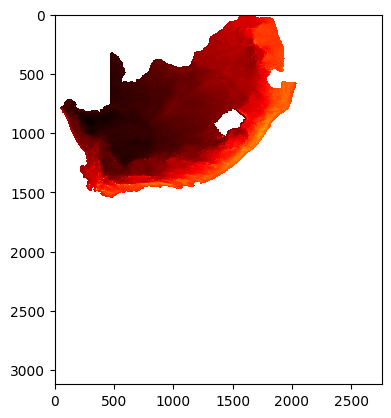

In [18]:
plt.imshow (img, cmap = 'hot_r', interpolation='nearest')

to understand the colormaps...

## Data centre locations

### Data Load

Locate data centre file

In [19]:
DATA_CENTRE_DIR = './DATA'
excel_files = [F for F in os.listdir(DATA_CENTRE_DIR) if F.endswith('xlsx')]
excel_files
DATA_CENTRE_FILE = DATA_CENTRE_DIR + '/' + excel_files[0]
wrangler = DataCentreWrangler(DATA_CENTRE_FILE)
_ = wrangler.read_excel_data()

In [20]:
dc_df = pd.read_excel(DATA_CENTRE_FILE)

In [21]:
wrangler.df.shape

(144, 7)

In [22]:
dc_df.head()

,Country,Étiquettes de lignes,Somme de Land Area [sqm],Somme de Build area \n[sqm],Somme de Available land [sqm],Somme de Total power consumption (kWh) per annum,Somme de Land Needed for Solar (Sqm)
0,Ghana,Accra Sakaman,11760.0,5010.0,6750.0,10019688.0,20796.363636
1,NaN,To be updated,11760.0,5010.0,6750.0,10019688.0,20796.363636
2,NaN,To be updated,11760.0,5010.0,6750.0,10019688.0,20796.363636
3,NaN,Accra Tetteh Quashie,10331.0,4044.0,755.0,9616071.0,19958.636364
4,NaN,To be updated,10331.0,4044.0,755.0,9616071.0,19958.636364


### Data wrangling

#### rename columns

In [23]:
colnames = [col for col in dc_df.columns]
colnames

['Country ',
 'Étiquettes de lignes',
 'Somme de Land Area [sqm]',
 'Somme de Build area \n[sqm]',
 'Somme de Available land [sqm]',
 'Somme de Total power consumption (kWh) per annum',
 'Somme de Land Needed for Solar (Sqm)']

In [24]:
mapping = {colnames[0]: 'Country',
           colnames[1]: 'Location',
           colnames[2]: 'Total Land Area',
           colnames[3]: 'Total Build Area', 
           colnames[4]: 'Total Available Land', 
           colnames[5]: 'Total Annual Power consumption',
           colnames[6]: 'Land requirement for Solar'}


In [25]:
dc_df = dc_df.rename(mapping, axis=1)
dc_df.head()

,Country,Location,Total Land Area,Total Build Area,Total Available Land,Total Annual Power consumption,Land requirement for Solar
0,Ghana,Accra Sakaman,11760.0,5010.0,6750.0,10019688.0,20796.363636
1,NaN,To be updated,11760.0,5010.0,6750.0,10019688.0,20796.363636
2,NaN,To be updated,11760.0,5010.0,6750.0,10019688.0,20796.363636
3,NaN,Accra Tetteh Quashie,10331.0,4044.0,755.0,9616071.0,19958.636364
4,NaN,To be updated,10331.0,4044.0,755.0,9616071.0,19958.636364


#### RSA cross-section

In [26]:
dc_df['Country'].value_counts()

Country
Ghana           1
Nigeria         1
South Africa    1
Name: count, dtype: int64

Need to fill in NaNs with previous value

In [27]:
dc_df.head(20)

,Country,Location,Total Land Area,Total Build Area,Total Available Land,Total Annual Power consumption,Land requirement for Solar
0,Ghana,Accra Sakaman,11760.0,5010.0,6750.0,10019688.0,20796.363636
1,NaN,To be updated,11760.0,5010.0,6750.0,10019688.0,20796.363636
2,NaN,To be updated,11760.0,5010.0,6750.0,10019688.0,20796.363636
3,NaN,Accra Tetteh Quashie,10331.0,4044.0,755.0,9616071.0,19958.636364
4,NaN,To be updated,10331.0,4044.0,755.0,9616071.0,19958.636364
5,NaN,To be updated,10331.0,4044.0,755.0,9616071.0,19958.636364
6,NaN,Cape Coast,1477.0,271.0,1206.0,1098504.0,2280.000000
7,NaN,To be updated,1477.0,271.0,1206.0,1098504.0,2280.000000
8,NaN,To be updated,1477.0,271.0,1206.0,1098504.0,2280.000000
9,NaN,"Kumasi, Kaase",19000.0,5092.0,13908.0,4102746.0,8515.454545


In [28]:
dc_df['Country'] = dc_df['Country'].ffill()
dc_df.head(20)

,Country,Location,Total Land Area,Total Build Area,Total Available Land,Total Annual Power consumption,Land requirement for Solar
0,Ghana,Accra Sakaman,11760.0,5010.0,6750.0,10019688.0,20796.363636
1,Ghana,To be updated,11760.0,5010.0,6750.0,10019688.0,20796.363636
2,Ghana,To be updated,11760.0,5010.0,6750.0,10019688.0,20796.363636
3,Ghana,Accra Tetteh Quashie,10331.0,4044.0,755.0,9616071.0,19958.636364
4,Ghana,To be updated,10331.0,4044.0,755.0,9616071.0,19958.636364
5,Ghana,To be updated,10331.0,4044.0,755.0,9616071.0,19958.636364
6,Ghana,Cape Coast,1477.0,271.0,1206.0,1098504.0,2280.000000
7,Ghana,To be updated,1477.0,271.0,1206.0,1098504.0,2280.000000
8,Ghana,To be updated,1477.0,271.0,1206.0,1098504.0,2280.000000
9,Ghana,"Kumasi, Kaase",19000.0,5092.0,13908.0,4102746.0,8515.454545


In [29]:
dc_df['Country'].value_counts()

Country
South Africa    81
Nigeria         51
Ghana           12
Name: count, dtype: int64

In [30]:
RSA_dc_df = dc_df.query('Country == "South Africa"')

In [31]:
RSA_dc_df.shape

(81, 7)

In [32]:
RSA_dc_df['Country'].unique()

array(['South Africa'], dtype=object)

### automated wrangling

In [33]:
wrangler.wrangle()

In [34]:
dc_df = wrangler.df
dc_df.head(10)

,Country,Total Land Area,Total Build Area,Total Available Land,Total Annual Power Consumption,Land Requirement for Solar,Site,Latitude,Longitude
0,South Africa,6379.00,929.0,5450.0,3412020.00,7081.818182,Berea Switch,E31 00.381,S29 51.443
3,South Africa,1390.00,1344.0,46.0,2504922.00,5199.090909,Bloemfontein Switch,E26 13.174,S29 06.934
6,South Africa,790.00,790.0,0.0,1489638.00,3091.818182,Cape Town Switch,E18 25.321,S33 55.810
9,South Africa,14856.00,3455.0,11401.0,6324720.00,13127.272727,Centurion,E28 10.206,S25 54.584
12,South Africa,5370.41,3934.0,0.0,12483000.00,25909.090909,Doornfontein,E28 03.333,S26 11.783
15,South Africa,9330.00,2440.0,6890.0,2338482.00,4853.636364,East London Remote Hub,E27 52.256,S33 02.268
18,South Africa,9256.00,2200.0,7056.0,3212292.00,6667.272727,Empangeni Remote Hub,E31 54.237,S28 46.082
21,South Africa,8933.00,1899.0,7034.0,2338482.00,4853.636364,Ermelo Remote Hub,E29 59.838,S26 31.890
24,South Africa,NaN,1399.0,NaN,6541092.00,13576.363636,Fairland,E27 55.862,S26 09.083
27,South Africa,10000.00,2240.0,7760.0,1975559.58,4100.372727,George Remote Hub,E22 26.445,S33 59.683


In [35]:
dc_df.shape

(27, 9)

## Project Data centres onto heat map

### prj metadata file read

In [36]:
DATA_CENTRE_DIR

'./DATA'

In [37]:
DATA_CENTRE_FILE

'./DATA/Data centres - preliminary information.xlsx'

In [38]:
with rasterio.open(TARGET_TIF) as src:
    left, bottom, right, top = src.bounds

In [39]:
for desc, loc in zip (['left', 'bottom', 'right', 'top'], [left, bottom, right, top]):
    print (f"{desc}: {loc}")


left: 16.0
bottom: -48.0
right: 39.0
top: -22.0


EUREKA!!!! Turns out the tif file is more than just a pretty picture!

### Project data centres onto heatmap

In [40]:
from IPython.display import Image
SAVE_LOCATION = './WorkingData/Maps/'

In [41]:
lat = [convert_to_decimal_degrees(L) for L in wrangler.df['Latitude'].to_list()]
long = [convert_to_decimal_degrees(L) for L in wrangler.df['Longitude'].to_list()]
coords = [(longitude, latitude) for longitude, latitude in zip(long, lat)]

In [42]:
manipulator = ImageManipulation()
title = 'dcShow'
manipulator.plot_image(img, title, src, coords=coords)

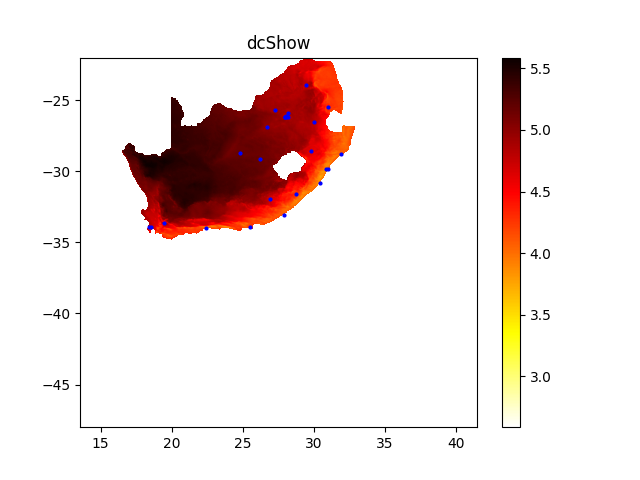

In [43]:
imfile = SAVE_LOCATION + title + '.png'
Image(imfile)

In [44]:
img.shape

(3120, 2760)

## Retrieving relevant info

In [45]:
df = wrangler.df

In [46]:
PVExpectations = [manipulator.get_pixel_value(lat, long, src, img) for lat, long in coords]

In [47]:
df['PVout'] = PVExpectations

In [48]:
df[['Site', 'Latitude', 'Longitude', 'PVout']]

,Site,Latitude,Longitude,PVout
0,Berea Switch,E31 00.381,S29 51.443,4.017
3,Bloemfontein Switch,E26 13.174,S29 06.934,5.111
6,Cape Town Switch,E18 25.321,S33 55.810,4.621
9,Centurion,E28 10.206,S25 54.584,4.878
12,Doornfontein,E28 03.333,S26 11.783,4.833
15,East London Remote Hub,E27 52.256,S33 02.268,4.108
18,Empangeni Remote Hub,E31 54.237,S28 46.082,4.112
21,Ermelo Remote Hub,E29 59.838,S26 31.890,4.833
24,Fairland,E27 55.862,S26 09.083,4.825
27,George Remote Hub,E22 26.445,S33 59.683,4.108


## Monthly solar interpolation

In [49]:
import os

In [50]:
os.listdir(os.getcwd())

['.git',
 '.gitignore',
 '.idea',
 '.ipynb_checkpoints',
 '.venv',
 'Analytics.py',
 'constants.py',
 'Data',
 'DataReader.py',
 'GSA Analysis.ipynb',
 'ImageManipulation.py',
 'landreq.xlsx',
 'WorkingData',
 '__pycache__']

In [51]:
MONTHLY_FILE_DIR = './Data/Global Solar Atlas/South-Africa_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF/South-Africa_GISdata_LTAy_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF/monthly/'
monthly_files = reader.get_all_tiffs(MONTHLY_FILE_DIR)
monthly_readers = [DataReader(monthly_file) for monthly_file in monthly_files]
MONTHS = ['Jan', 
          'Feb', 
          'Mar',
          'Apr',
          'May',
          'Jun',
          'Jul',
          'Aug',
          'Sep',
          'Oct',
          'Nov',
          'Dec']


Prototype for month 1 - Jan

### Data in

In [52]:
import os
DATA_DIR = './DATA'
excel_files = [F for F in os.listdir(DATA_DIR) if F.endswith('xlsx')]
excel_files
TARGET_FILE = DATA_DIR + '/' + excel_files[0]
wrangler = DataCentreWrangler(TARGET_FILE)
wrangler.wrangle()

In [53]:
reader_i = monthly_readers[0]
img_i, transform_i, src_i = reader_i.read_tiff()
manip_i = ImageManipulation()

In [54]:
lat, long, coords = wrangler.get_coordinate_list()

PVJan = [manipulator.get_pixel_value(lat, long, src, img) for lat, long in coords]

In [55]:
lat, long, coords = wrangler.get_coordinate_list()
for month_i, reader_i in zip (MONTHS, monthly_readers):    
    img_i, _, src_i = reader_i.read_tiff()
    wrangler.df[month_i] = [manipulator.get_pixel_value(lat_i, long_i, src_i, img_i) for lat_i, long_i in coords]

In [56]:
wrangler.df.columns

Index(['Country', 'Total Land Area', 'Total Build Area',
       'Total Available Land', 'Total Annual Power Consumption',
       'Land Requirement for Solar', 'Site', 'Latitude', 'Longitude', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec'],
      dtype='object')

### Variance and Std Dev

In [57]:
wrangler.df['mean'] = wrangler.df[MONTHS].mean(axis=1)
wrangler.df['vari'] = wrangler.df[MONTHS].var(axis=1)
wrangler.df['std'] = wrangler.df[MONTHS].std(axis=1)

In [58]:
wrangler.df[['Site', 'mean', 'vari', 'std']]

,Site,mean,vari,std
0,Berea Switch,124.751411,28.500076,5.338546
3,Bloemfontein Switch,157.255829,72.364960,8.506760
6,Cape Town Switch,145.681747,1199.115967,34.628254
9,Centurion,151.091507,115.294754,10.737539
12,Doornfontein,149.564499,152.047531,12.330755
15,East London Remote Hub,128.797913,70.749352,8.411263
18,Empangeni Remote Hub,127.105743,31.501144,5.612588
21,Ermelo Remote Hub,149.222580,96.182739,9.807280
24,Fairland,149.450684,143.833481,11.993060
27,George Remote Hub,128.157074,140.781799,11.865150


<Axes: xlabel='Site'>

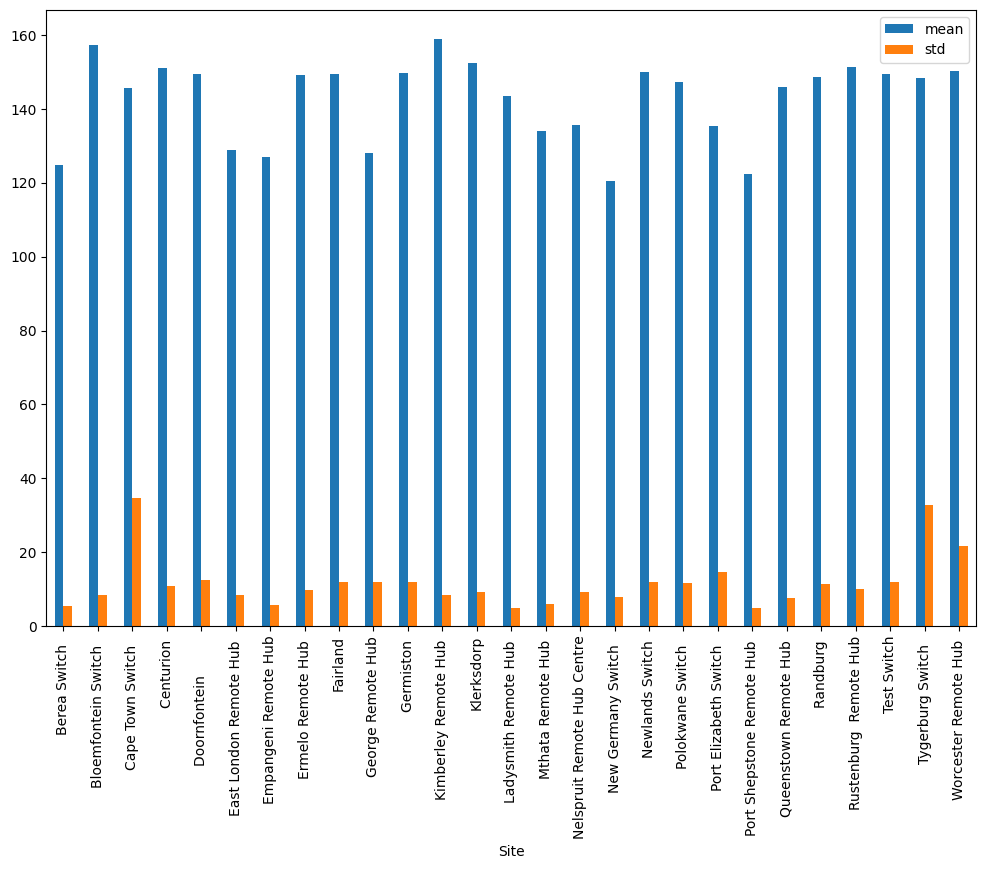

In [59]:
plt.rcParams['figure.figsize'] = [12,8]
bar_df = wrangler.df[['Site', 'mean', 'std']]
bar_df.set_index('Site', inplace=True)
bar_df.plot(kind='bar')

## Population Data

### Data Load

In [60]:
POP_DIR = './Data/NASA-SEDAC/gpw-v4-population-density-rev11_2020_2pt5_min_tif'

In [61]:
os.listdir(POP_DIR)

['gpw_v4_population_density_rev11_2020_2pt5_min.tif',
 'gpw_v4_population_density_rev11_2020_2pt5_min_tif_readme.txt']

In [62]:
POP_FIL = POP_DIR + '/gpw_v4_population_density_rev11_2020_2pt5_min.tif'

In [63]:
with rasterio.open(POP_FIL) as fil:
    bounds = fil.bounds
bounds

BoundingBox(left=-180.0, bottom=-90.0000000000002, right=180.00000000000028, top=89.99999999999994)

In [64]:
with rasterio.open (POP_FIL) as fil:
    img_wrld = fil.read(1)

In [65]:
import pylab as pl

### Initial Visualisation

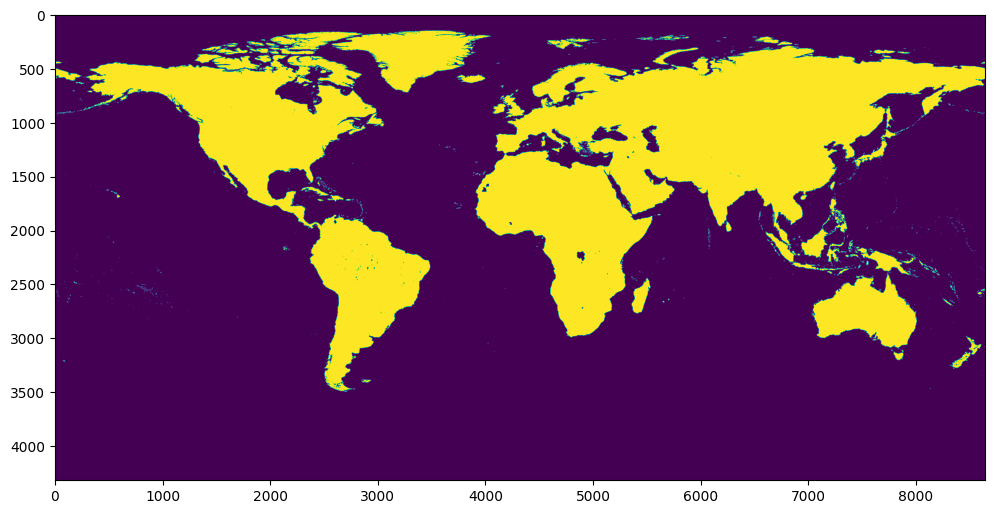

In [66]:
pl.imshow(img_wrld)

In [67]:
SAVE_LOCATION

'./WorkingData/Maps/'

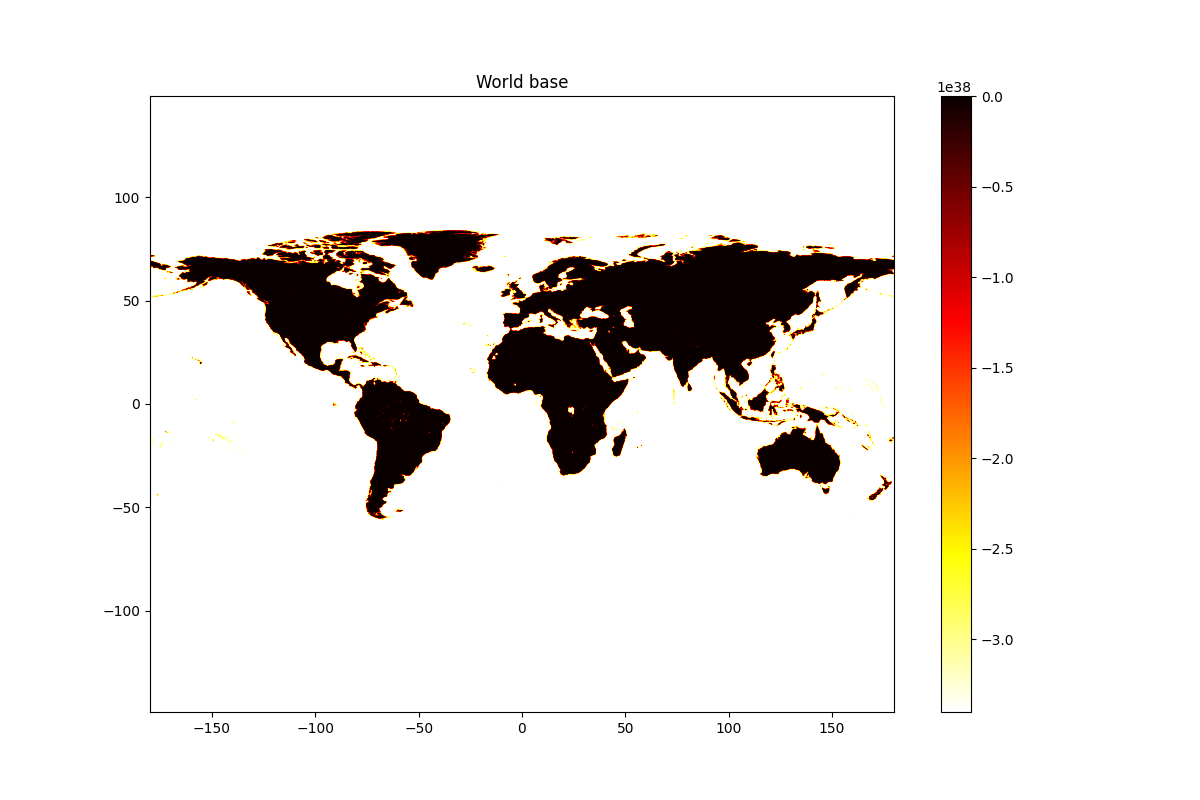

In [68]:
title = 'World base'
imfilewrld = SAVE_LOCATION + title + '.png'
manipulator.plot_image(img_wrld, title, fil)
Image(imfilewrld)

### Value / Format investigation

In [69]:
img_wrld.shape

(4320, 8640)

In [70]:
img_wrld.flatten().shape

(37324800,)

In [71]:
pd.DataFrame(img_wrld.flatten()).describe()

C:\Users\hurwi\Africa50\.venv\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\hurwi\Africa50\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,0
count,3.732480e+07
mean,-inf
std,inf
min,-3.402823e+38
25%,-3.402823e+38
50%,-3.402823e+38
75%,-3.402823e+38
max,1.033408e+05


In [72]:
flattie = img_wrld.flatten()

In [73]:
pd.DataFrame(flattie).describe()

C:\Users\hurwi\Africa50\.venv\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\hurwi\Africa50\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,0
count,3.732480e+07
mean,-inf
std,inf
min,-3.402823e+38
25%,-3.402823e+38
50%,-3.402823e+38
75%,-3.402823e+38
max,1.033408e+05


In [74]:
flattie[flattie >= 0].shape

(9040743,)

In [75]:
flattie.shape[0]

37324800

In [76]:
(flattie.shape[0] - flattie[flattie<=0].shape[0])/flattie.shape[0]

0.20229981138545952

In [77]:
pd.DataFrame(flattie[flattie<0]).value_counts()

0            
-3.402823e+38    28284057
Name: count, dtype: int64

OK, stupid convention. massive negative number should be a NaN value. ffs

In [78]:
img_wrld[img_wrld < 0] = np.NaN

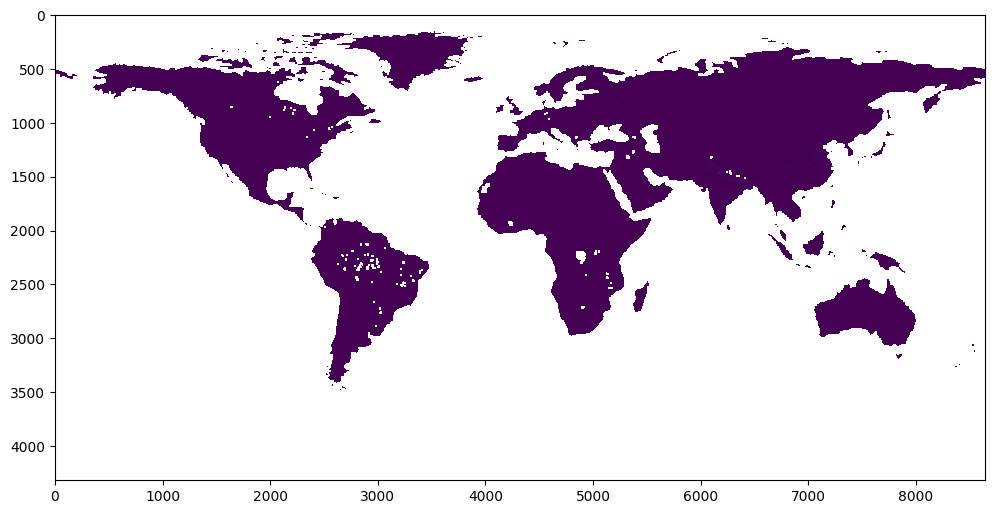

In [79]:
plt.imshow(img_wrld)

In [80]:
flattie2 = img_wrld.flatten()
flattie2 = flattie2[np.isnan(flattie2) == False]

In [81]:
pd.DataFrame(flattie2).describe()

,0
count,9.040743e+06
mean,5.159443e+01
std,4.067684e+02
min,0.000000e+00
25%,2.065871e-02
50%,8.950732e-01
75%,1.362997e+01
max,1.033408e+05


### Home in on a country (RSA)

In [82]:
src.bounds

BoundingBox(left=16.0, bottom=-48.0, right=39.0, top=-22.0)

In [83]:
Lft, Tp = rasterio.transform.rowcol (fil.transform, 16, -22)
print (Lft, Tp)
Rt, Bt = rasterio.transform.rowcol (fil.transform, 39, -48)
print (Rt, Bt)

2687 4703
3311 5255


In [84]:
[N for N in zip([Tp, Bt, Rt, Lft])]

[(4703,), (5255,), (3311,), (2687,)]

In [85]:
window = rasterio.windows.Window.from_slices ((Tp, Bt), (Lft, Rt))


In [86]:
with rasterio.open(POP_FIL) as fil:
    subset = fil.read(1, window=window)

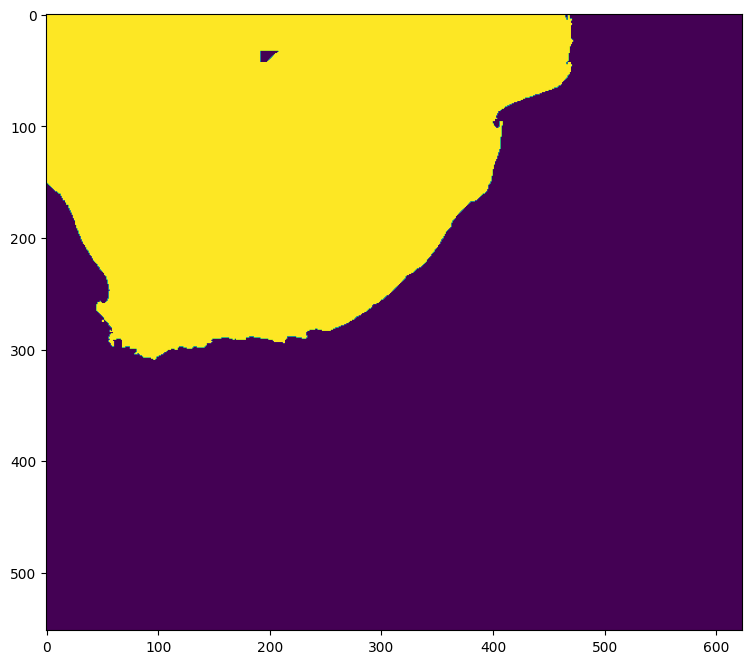

In [87]:
with rasterio.open(POP_FIL) as the_source:
    the_image = the_source.read(1, window = rasterio.windows.Window(Tp, Lft, (Rt-Lft), (Bt-Tp)))
    # the_image = the_source.read(1)
plt.imshow(the_image)

In [88]:
imvals = the_image.flatten()
imvals[imvals<0] = np.NaN

#### Fix format for useful values

In [89]:
pd.DataFrame(imvals).describe()

,0
count,107587.000000
mean,36.716747
std,310.200439
min,0.000000
25%,0.168212
50%,0.888646
75%,5.427535
max,17841.080078


In [90]:
the_clean_image = the_image.copy()
the_clean_image[the_clean_image < 0] = np.NaN

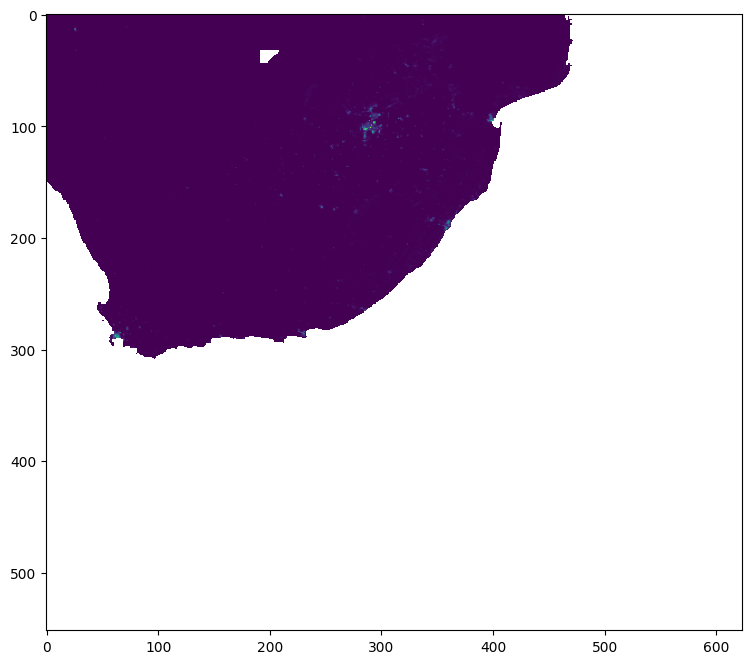

In [91]:
plt.imshow(the_clean_image)

In [92]:
pd.DataFrame(the_clean_image.flatten()).describe()

,0
count,107587.000000
mean,36.716747
std,310.200439
min,0.000000
25%,0.168212
50%,0.888646
75%,5.427535
max,17841.080078


In [93]:
clean_values = the_clean_image.flatten()
clean_values = clean_values[np.isnan(clean_values) == False]

(-1.0, 1200.0)

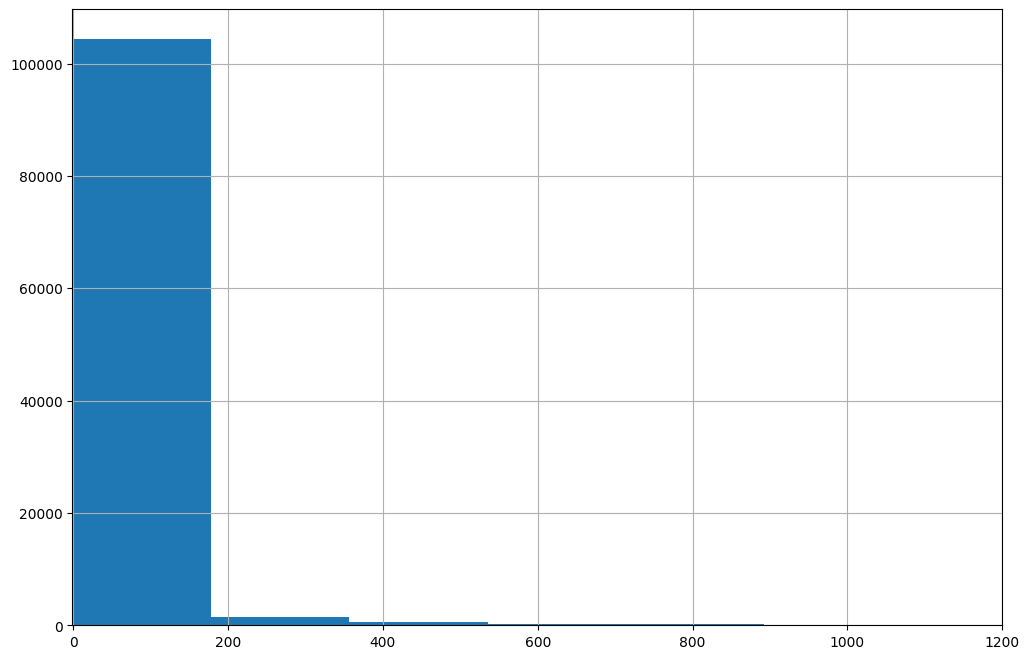

In [94]:
hts, bins, _ = plt.hist(clean_values, bins=100)
plt.grid()
plt.xlim((-1,1200))

In [95]:
hts

array([1.04444e+05, 1.42200e+03, 5.10000e+02, 2.69000e+02, 1.42000e+02,
       1.15000e+02, 1.05000e+02, 6.40000e+01, 6.40000e+01, 4.80000e+01,
       4.70000e+01, 3.70000e+01, 3.50000e+01, 2.60000e+01, 2.50000e+01,
       1.50000e+01, 2.00000e+01, 1.60000e+01, 1.60000e+01, 1.20000e+01,
       7.00000e+00, 6.00000e+00, 9.00000e+00, 1.40000e+01, 1.00000e+01,
       4.00000e+00, 4.00000e+00, 5.00000e+00, 9.00000e+00, 2.00000e+00,
       7.00000e+00, 4.00000e+00, 8.00000e+00, 4.00000e+00, 6.00000e+00,
       5.00000e+00, 3.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00,
       3.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00, 3.00000e+00,
       2.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+00,
       0.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 0.000

In [96]:
bins[:5]

array([  0.        , 178.41079712, 356.82159424, 535.23242188,
       713.64318848])

### More detailed dataset?

In [97]:
POP_DIR = './Data/NASA-SEDAC/gpw-v4-population-density-rev11_2020_30_sec_tif/'

pop_files = [F for F in os.listdir(POP_DIR)]
pop_files

pop_fil = POP_DIR + pop_files[0]

In [98]:
with rasterio.open (POP_FIL) as fil:
    img_wrld = fil.read(1)

#### Initial Vis

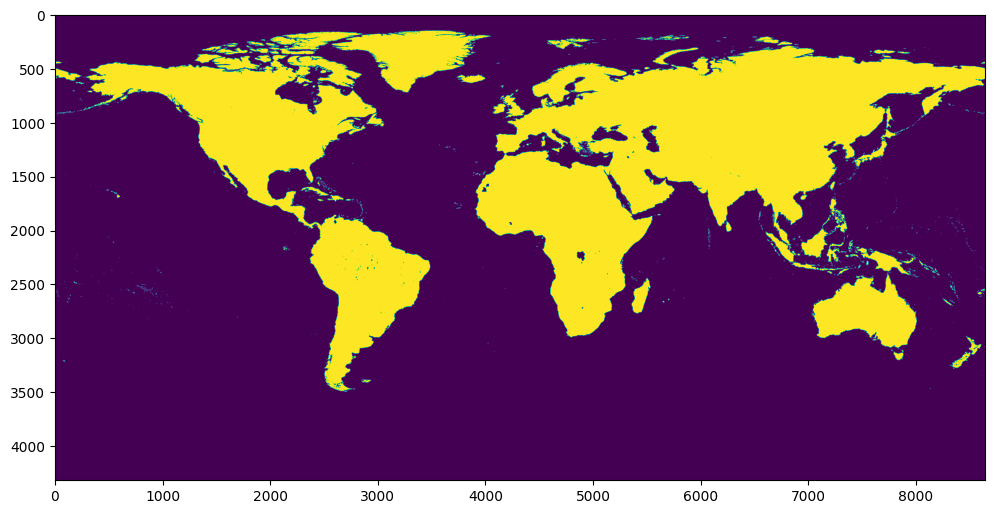

In [99]:
pl.imshow(img_wrld)

Could be better, could be exactly the same

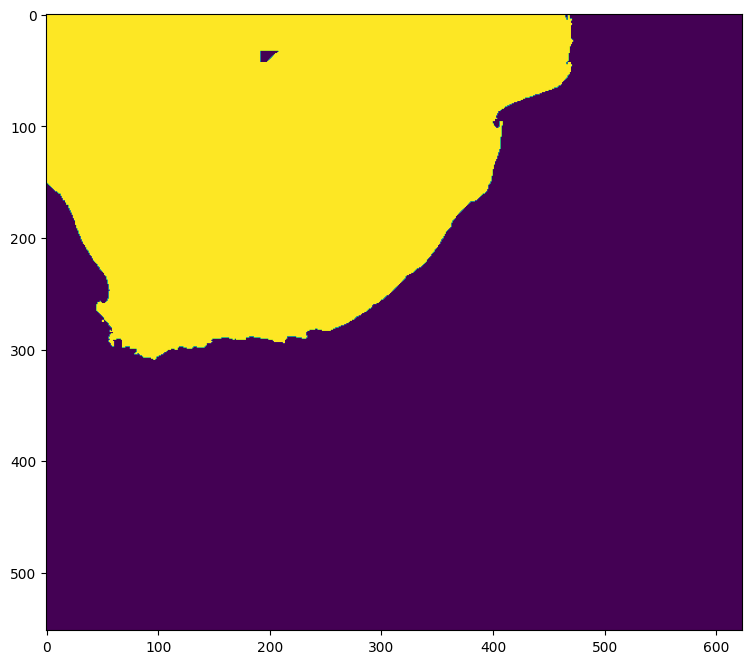

In [100]:
with rasterio.open(POP_FIL) as the_source:
    the_image = the_source.read(1, window = rasterio.windows.Window(Tp, Lft, (Rt-Lft), (Bt-Tp)))
    # the_image = the_source.read(1)
plt.imshow(the_image)

no joy, looks exactly the same

### Try cleaning

In [101]:
the_image.shape

(552, 624)

In [102]:
clean_img = the_image.copy()
clean_img[clean_img < 0] = np.NaN

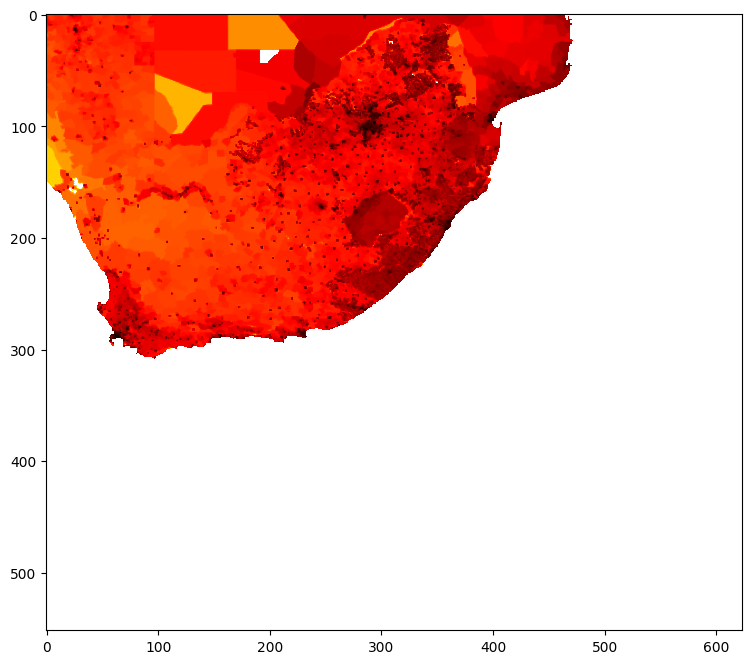

In [103]:
_ = plt.imshow(clean_img, cmap='hot_r', norm='log')

YAY!!!!! <br>
The "norm = 'log'" allows for logarithmic normalisation

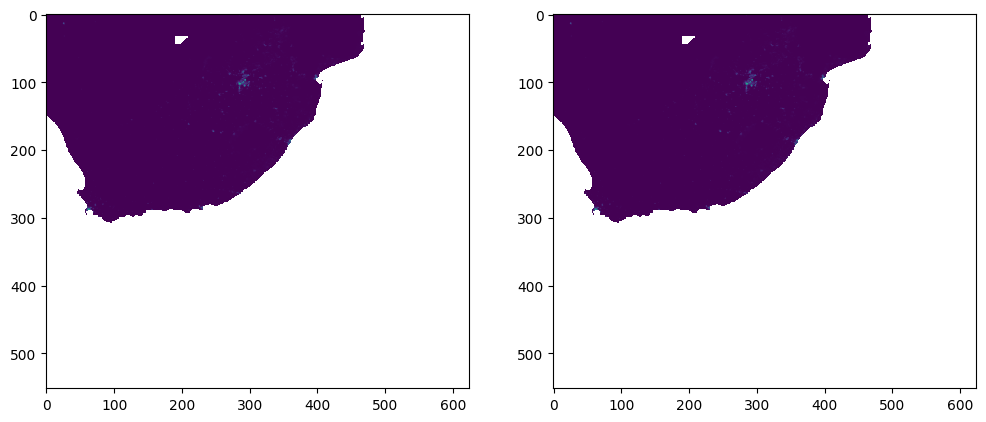

In [104]:
plt.subplot(1, 2, 1)
_ = plt.imshow (the_clean_image)
plt.subplot(1, 2, 2)
_ = plt.imshow (clean_img)

## Land Use

### Data Load

In [105]:
IGNORE_THIS = True

In [106]:
LAND_DIR = 'C:/Users/hurwi/Africa50/Data/SA_NLC_2020_Geographic.tif.vat'

In [107]:
os.listdir(LAND_DIR)

['SA_NLC_2020_GEO.tif',
 'SA_NLC_2020_GEO.tif.vat.cpg',
 'SA_NLC_2020_GEO.tif.vat.dbf']

In [108]:
LAND_FIL = LAND_DIR + '/' + [F for F in os.listdir(LAND_DIR)][0]
LAND_FIL

'C:/Users/hurwi/Africa50/Data/SA_NLC_2020_Geographic.tif.vat/SA_NLC_2020_GEO.tif'

In [109]:
if not IGNORE_THIS:
    land_reader = DataReader(LAND_FIL)
    land_img, land_transfer, land_src = land_reader.read_tiff()
    plt.imshow(land_img)

So quite a richly-detailed view. Most importantly, it's also in GEOTIFF format!

## Land price data

### Provincial Baseline

In [110]:
PROP_PRICE_LOCATION = './Data/PropertyPrices/'
PROP_FILE = PROP_PRICE_LOCATION + 'RSAPropertyPrices.xlsx'

In [111]:
df_provincial = pd.read_excel(PROP_FILE)

In [112]:
df_provincial

,Province,PricePerHectare
0,Eastern Cape,2110
1,Free State,2589
2,Gauteng,10989
3,KwaZulu-Natal,4994
4,Limpopo,2685
5,Mpumalanga,4634
6,Northern Cape,638
7,North West,2754
8,Western Cape,4060


In [113]:
provinces = df_provincial.Province.unique()
provinces

array(['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal',
       'Limpopo', 'Mpumalanga', 'Northern Cape', 'North West',
       'Western Cape'], dtype=object)

In [114]:
def get_province_baseline (target_province: str, df: pd.DataFrame) -> float:

    if 'Province' not in df.columns:
        return -1
    if target_province not in df.Province.unique():
        return -1    
    
    return df[df.Province == target_province].PricePerHectare.values[0]


In [115]:
get_province_baseline ('London', df_provincial)

-1

In [116]:
get_province_baseline ('Gauteng', df_provincial)

10989

Excellent, now to tie back to a geographic location

### Find which province a geolocation is situation in

#### Data Load

In [117]:
PROVINCE_DIR = './Data/Location/'

In [118]:
JSON_FILES = [F for F in os.listdir(PROVINCE_DIR) if F.endswith('json')]
JSON_FILES

['za.json']

In [119]:
JSON_FIL = PROVINCE_DIR + JSON_FILES[0]
JSON_FIL

'./Data/Location/za.json'

load in GeoJSON data

In [120]:
prov_reader = DataReader(JSON_FIL)

In [121]:
prov_df = prov_reader.read_json()

In [122]:
prov_df.shape

(9, 2)

In [123]:
prov_df

,type,features
0,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
1,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
2,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
3,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
4,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
5,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
6,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
7,FeatureCollection,"{'geometry': {'type': 'MultiPolygon', 'coordin..."
8,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."


That isn't great. Lets try with geopandas

In [124]:
import geopandas as gpd

In [125]:
gdf = gpd.read_file(JSON_FIL)

In [126]:
gdf

,source,id,name,geometry
0,https://simplemaps.com,ZANC,Northern Cape,"POLYGON ((22.63695 -26.11428, 22.70516 -26.129..."
1,https://simplemaps.com,ZANL,KwaZulu-Natal,"POLYGON ((30.19597 -31.07789, 30.19250 -31.072..."
2,https://simplemaps.com,ZAFS,Free State,"POLYGON ((25.46747 -30.61312, 25.43161 -30.592..."
3,https://simplemaps.com,ZAEC,Eastern Cape,"POLYGON ((24.14703 -31.78989, 24.15432 -31.758..."
4,https://simplemaps.com,ZALP,Limpopo,"POLYGON ((31.85649 -23.96296, 31.85623 -23.963..."
5,https://simplemaps.com,ZANW,North West,"POLYGON ((25.01349 -28.06821, 25.00512 -28.070..."
6,https://simplemaps.com,ZAMP,Mpumalanga,"POLYGON ((31.24471 -27.23259, 31.18764 -27.297..."
7,https://simplemaps.com,ZAWC,Western Cape,"MULTIPOLYGON (((17.76711 -31.15581, 17.76742 -..."
8,https://simplemaps.com,ZAGT,Gauteng,"POLYGON ((28.25583 -26.89360, 28.24466 -26.894..."


Much Better!

#### Find Province

In [127]:
from ImageManipulation import determine_name

In [128]:
determine_name(latitude= -25, longitude = 30, location_frame=gdf)

'Limpopo'

BOOYAH!

test the all-in-1 function to make this happen

#### Find land price baseline

In [129]:
from ImageManipulation import get_province_baseline_from_geocoordinates

In [130]:
get_province_baseline_from_geocoordinates (longitude=30, latitude=-25, df_in=df_provincial, gdf_in=gdf)

2685

## Land Price visualisations

In [131]:
from rasterio.features import rasterize

### create province-price dictionary

In [132]:
df_provincial

,Province,PricePerHectare
0,Eastern Cape,2110
1,Free State,2589
2,Gauteng,10989
3,KwaZulu-Natal,4994
4,Limpopo,2685
5,Mpumalanga,4634
6,Northern Cape,638
7,North West,2754
8,Western Cape,4060


In [133]:
prov_dict = df_provincial.set_index(df_provincial.columns[0])[df_provincial.columns[1]].to_dict()
prov_dict

{'Eastern Cape': 2110,
 'Free State': 2589,
 'Gauteng': 10989,
 'KwaZulu-Natal': 4994,
 'Limpopo': 2685,
 'Mpumalanga': 4634,
 'Northern Cape': 638,
 'North West': 2754,
 'Western Cape': 4060}

### Read baseline GeoTIFF

In [134]:
TARGET_TIF

'Data/Global Solar Atlas/PVOUT.tif'

In [135]:
base_reader = DataReader(TARGET_TIF)
base_img, _, base_src = base_reader.read_tiff()

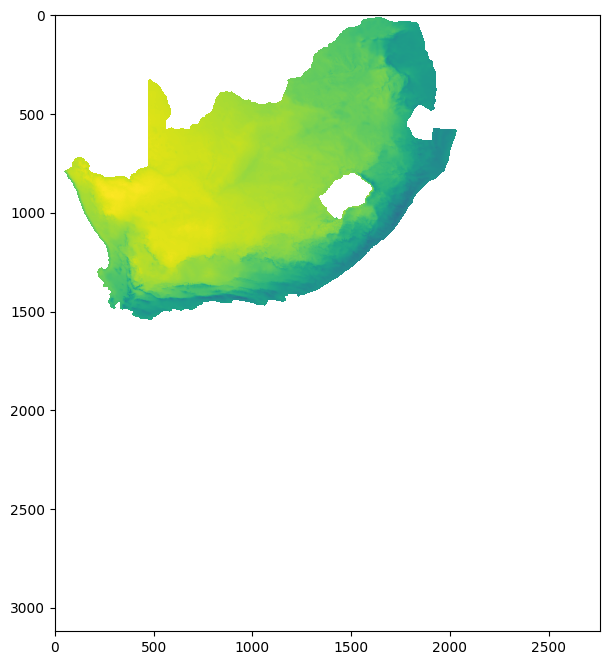

In [136]:
plt.imshow(base_img)

### Overlay with categories from the GeoDataFrame

In [137]:
cat_gdf = gpd.read_file(JSON_FIL)

capture base land values

In [138]:
cat_gdf['base_value'] = [prov_dict[Name] for Name in cat_gdf.name.values]
cat_gdf

,source,id,name,geometry,base_value
0,https://simplemaps.com,ZANC,Northern Cape,"POLYGON ((22.63695 -26.11428, 22.70516 -26.129...",638
1,https://simplemaps.com,ZANL,KwaZulu-Natal,"POLYGON ((30.19597 -31.07789, 30.19250 -31.072...",4994
2,https://simplemaps.com,ZAFS,Free State,"POLYGON ((25.46747 -30.61312, 25.43161 -30.592...",2589
3,https://simplemaps.com,ZAEC,Eastern Cape,"POLYGON ((24.14703 -31.78989, 24.15432 -31.758...",2110
4,https://simplemaps.com,ZALP,Limpopo,"POLYGON ((31.85649 -23.96296, 31.85623 -23.963...",2685
5,https://simplemaps.com,ZANW,North West,"POLYGON ((25.01349 -28.06821, 25.00512 -28.070...",2754
6,https://simplemaps.com,ZAMP,Mpumalanga,"POLYGON ((31.24471 -27.23259, 31.18764 -27.297...",4634
7,https://simplemaps.com,ZAWC,Western Cape,"MULTIPOLYGON (((17.76711 -31.15581, 17.76742 -...",4060
8,https://simplemaps.com,ZAGT,Gauteng,"POLYGON ((28.25583 -26.89360, 28.24466 -26.894...",10989


In [139]:
shapes = ((geom,value) for geom, value in zip(cat_gdf.geometry, cat_gdf.base_value))

In [140]:
category_array = rasterize(shapes=shapes, out_shape=base_img.shape, transform=base_src.transform, fill=0, all_touched=True)

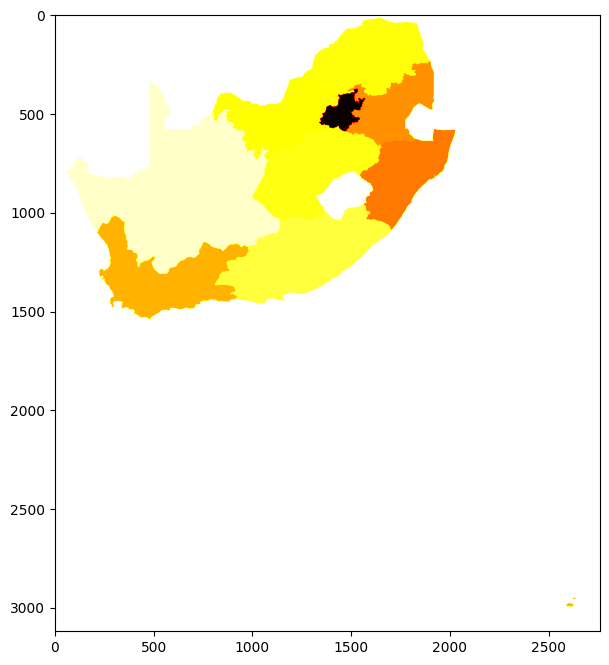

In [141]:
plt.imshow(category_array, cmap='hot_r')

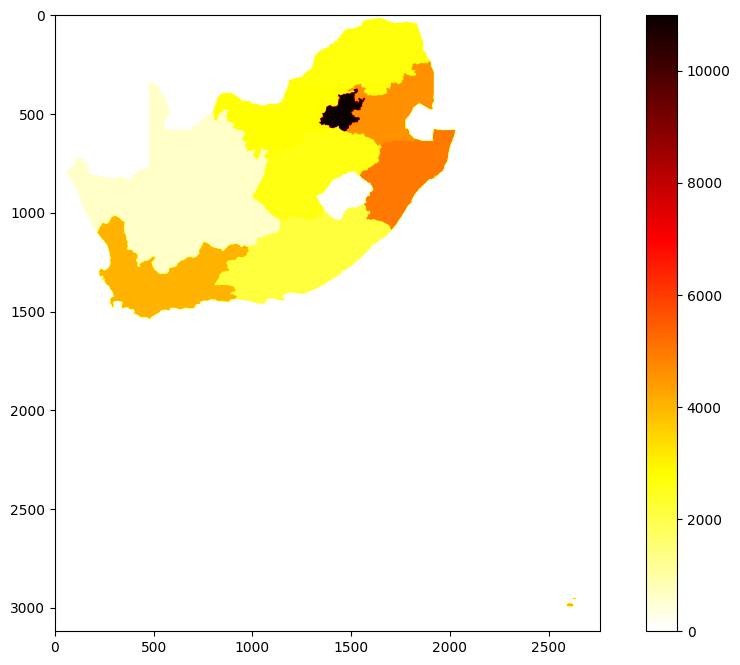

In [142]:
pl.imshow(category_array, cmap='hot_r')
plt.colorbar()

hmmm, I don't like that at all

In [143]:
pd.DataFrame(category_array.flatten()).value_counts()

0    
0        6977208
638       498758
2110      234156
4060      182485
2589      172295
2685      160098
2754      137700
4994      125322
4634       98812
10989      24366
Name: count, dtype: int64

In [144]:
unique_values = np.unique(category_array)
unique_values

array([    0,   638,  2110,  2589,  2685,  2754,  4060,  4634,  4994,
       10989], dtype=uint16)

## Land Quantity Estimates

In [145]:
from Analytics import calculate_required_land

In [146]:
YSUM_DIR = './Data/Global Solar Atlas/YearlySum/'
YSUM_GHI = YSUM_DIR + 'GHI.tif'

In [147]:
wrangler.file_path

'./DATA/Data centres - preliminary information.xlsx'

In [148]:
wrangler.wrangle()
data_centre_df = wrangler.df.copy()
type(data_centre_df)

pandas.core.frame.DataFrame

In [149]:
solar_read = DataReader(YSUM_GHI)
solar_image, solar_transform, solar_src = solar_read.read_tiff()

In [150]:
data_centre_df = ImageManipulation().get_PV_from_tiff(src=solar_src,
                                                          img=solar_image,
                                                          data_centre_frame=data_centre_df)

In [151]:
data_centre_df = calculate_required_land(data_centre_df)

In [152]:
[C for C in data_centre_df.columns]

['Country',
 'Total Land Area',
 'Total Build Area',
 'Total Available Land',
 'Total Annual Power Consumption',
 'Land Requirement for Solar',
 'Site',
 'Latitude',
 'Longitude',
 'PV',
 'Expected Total Land Required',
 'Excess Land Required']

In [153]:
view_cols = ['Site', 'Total Annual Power Consumption', 'PV', 'Land Requirement for Solar','Expected Total Land Required', 'Excess Land Required']
data_centre_df[view_cols]

,Site,Total Annual Power Consumption,PV,Land Requirement for Solar,Expected Total Land Required,Excess Land Required
0,Berea Switch,3412020.00,1652,7081.818182,10326.937046,4876.937046
3,Bloemfontein Switch,2504922.00,2098,5199.090909,5969.785510,5923.785510
6,Cape Town Switch,1489638.00,1890,3091.818182,3940.841270,3940.841270
9,Centurion,6324720.00,2020,13127.272727,15655.247525,4254.247525
12,Doornfontein,12483000.00,1985,25909.090909,31443.324937,31443.324937
15,East London Remote Hub,2338482.00,1658,4853.636364,7052.117008,162.117008
18,Empangeni Remote Hub,3212292.00,1709,6667.272727,9398.162668,2342.162668
21,Ermelo Remote Hub,2338482.00,1975,4853.636364,5920.207595,0.000000
24,Fairland,6541092.00,1986,13576.363636,16468.006042,16468.006042
27,George Remote Hub,1975559.58,1646,4100.372727,6001.092284,0.000000


In [154]:
data_centre_df.query('Site == "Fairland"')

,Country,Total Land Area,Total Build Area,Total Available Land,Total Annual Power Consumption,Land Requirement for Solar,Site,Latitude,Longitude,PV,Expected Total Land Required,Excess Land Required
24,South Africa,NaN,1399.0,0.0,6541092.0,13576.363636,Fairland,E27 55.862,S26 09.083,1986,16468.006042,16468.006042


In [155]:
data_centre_df.shape

(27, 12)

In [156]:
data_centre_df[view_cols].to_excel('landreq.xlsx')